# Лабораторна робота № 1

**Тема.** Аналіз флуктуацій часового ряду 

**Мета.** Навчитися використовувати аналіз флуктуацій та його похідні для отримання нелінійних характеристик часового ряду

## Теоретичні відомості 

### Аналіз динаміки прибутків, модулів прибутків та волатильностей

Останнім часом вчені все більше цікавляться економічними часовими рядами, і відбувається це за кількох причин, зокрема: (1) економічні часові ряди, такі як індекси акцій, курсів валют, залежать від розвитку великої кількості взаємодіючих систем, і є прикладами складних систем, що широко вивчаються у науці; (2) з'явилась велика кількість доступних баз з даними про економічні системи, що містять інформацію з різними часовими шкалами (починаючи з 1 хвилини і закінчуючи 1 роком). Внаслідок цього вже на даний час існує також велика кількість розроблених методів (зокрема, у статистичній фізиці), спрямованих на отримання характеристик цін акцій чи курсів валют, що еволюціонують у часі. 

Дослідження, проведені над часовими рядами, показують, що стохастичний процес, який лежить у основі зміни ціни, характеризується кількома ознаками. Розподіл зміни ціни має виділений хвіст порівняно із Гаусовим розподілом. Функція автокореляції зміни ціни спадає експоненційно з певним характерним часом. Однак, виявляється, що амплітуда зміни ціни, виміряна за абсолютними значеннями чи квадратами цін, показує степеневі кореляції з довго часовою персистентністю аж до кількох місяців, або навіть років. Такі довгочасові залежності краще моделюються з використанням «додаткового процесу», що в економічній літературі часто називається волатильністю. Волатильність змін ціни акції є мірою того, як сильно ринок схильний до флуктуацій, тобто відхилень ціни від попередніх значень. 

Першим кроком при проведенні аналізу є побудова оцінювача волатильності. Ми будемо отримувати волатильність як локальне середнє модуля зміни ціни.

Розуміння статистичних властивостей волатильності має також важливе практичне застосування. Волатильність є інтересом торговців, оскільки визначає ризик і є ключовим входом практично до всіх моделей цін опціонів (вторинного цінного паперу), включаючи і класичну модель Блека-Шоулза. Без задовільних методів оцінювання волатильності трейдерам було б надзвичайно важко визначати ситуації, в яких опціони попадають в недооцінку чи переоцінку.

### Визначення волатильності 

Термін волатильність представляє узагальнену міру величини ринкових флуктуацій (відхилень). У літературі існує досить багато визначень волатильності, проте ми будемо використовувати наступне: *волатильність є локальним середнім модуля зміни ціни на відповідному часовому інтервалі $T$, що є рухомим параметром нашої оцінки*. Для індексу $X(t)$ визначимо зміну ціни $G(t)$ як зміну логарифмів індексів,

$$
G(t) = \ln{X(t+\Delta t) - \ln{X(t)}} \cong \left[ X(t+\Delta t) - X(t) \right] \big/ X(t),
$$ {#eq-1-1}

де $\Delta t$ є часовим інтервалом затримки. Величину ([-@eq-1-1]) називають прибутковістю (return). Якщо використовувати границі, то малі зміни $X(t)$ приблизно відповідають змінам, визначеним другою рівністю. Ми лише підраховуємо час роботи ринку, викидаємо ночі, вихідні та свята із набору даних, тобто, вважаємо, що ринок працює без перерв.

Модуль $G(t)$ описує амплітуду флуктуацій. У порівнянні зі значеннями $G(t)$ їх модуль не показує глобальних трендів, але великі значення $G(t)$ відповідають крахам та великим миттєвим змінам на ринках. 

Визначимо волатильність як середнє від $G(t)$ для часових вікон $T = n \cdot \Delta t$, тобто

$$
V_{T} = \frac{1}{n}\sum_{t^{'}=t}^{t+n-1}\left| G(t^{'}) \right|, 
$$ {#eq-1-2}

де $n$ є цілим числом. Таке визначення може бути ще узагальнене заміною $G(t)$ на $\left| G(t) \right|^{\gamma}$, де $\gamma > 1$ дає більш виражені великі значення $G(t)$, в той час як $0 < \gamma < 1$ виділяє малі значення $G(t)$.

У цьому визначенні волатильності використовується два параметри: $\Delta t$ та $n$. Параметр $n$ є шаблонним (чи модельним) часовим інтервалом для даних, а параметр $\Delta t$ є кроком переміщення часового вікна. Зауважимо, що вказане визначення волатильності має внутрішню помилку, а саме: вибір більшого часового інтервалу $T$ веде до збільшення точності визначення волатильності. Однак, велике значення $T$ також включає погане розбиття часу на інтервали, що веде, у свою чергу, до врахування не всієї прихованої у ряді інформації.

### Визначення кореляцій

Для визначення кореляцій часового ряду використовується функція автокореляції. Саме поняття *автокореляції* означає кореляцію часового ряду самого з собою (між попередніми та наступними значеннями). Автокореляцію іноді називають *послідовною кореляцією*, що означає кореляцію між членами ряду чисел, розташованих у певному порядку. Також синонімами цього терміну є *лагова кореляція* та *персистентність*. Наприклад, часто зустрічається автокореляція геофізичних процесів, що означає перенесення залишкового процесу на наступні часові проміжки.

Позитивно автокорельований часовий ряд часто називають персистентним, що значить існування тенденції слідування великих значень за великими та малих за малими, інакше позитивно корельований часовий ряд можна назвати інертним.

Візьмемо $N$ пар спостережень двох змінних $x$ та $y$. Коефіцієнт кореляції між парами $x$ та $y$ визначається як

$$
r = \frac{\sum \left( x_i - \bar{x} \right) \left( y_i - \bar{y} \right)}{\sqrt{\sum \left( x_i - \bar{x} \right)^{2}} \sqrt{\sum \left( y_i - \bar{y} \right)^{2}}}, 
$$ {#eq-1-3}

де сума знаходиться за всіма $N$ спостереженням.

Таким же чином можна визначати й автокореляцію, або ж кореляцію всередині досліджуваного часового ряду. Для автокореляції першого порядку береться лаг (часова затримка), рівний 1 часовій одиниці. Отже, автокореляція першого порядку використовує перші $N−1$ спостережень $x_t, t = 1,..., N−1$ та наступні $N−1$ спостережень $x_t , t = 2,..., N$.

Кореляція між $x_t$ та $x_t + 1$ визначається як

$$
r_1 = \frac{\sum_{t=1}^{N-1} \left( x_t - \bar{x} \right) \left( x_{t+1} - \bar{x} \right)}{\sum_{t=1}^{N}\left( x_t - \bar{x} \right)^2}, 
$$ {#eq-1-4}

де $x$ --- це середнє для досліджуваного періоду. 

Рівняння ([-@eq-1-4]) може бути узагальнене для отримання кореляції між спостереженнями, розділеними $k$ часовими інтервалами:

$$
r_k = \frac{\sum_{t=1}^{N-k} \left( x_t - \bar{x} \right) \left( x_{t+k} - \bar{x} \right)}{\sum_{t=1}^{N}\left( x_t - \bar{x} \right)^2}. 
$$ {#eq-5}

Значення $r_k$ називається коефіцієнтом автокореляції з лагом $k$. Графік функції автокореляції як залежності $r_k$ від $k$ також називають корелограмою.

## Хід роботи

Для подальшої роботи з моделювання складних систем візьмемо з основу бібліотеку `yfinance`, що дозволяє працювати з даними фінансових ринків засобами мови програмування Python. 

:::{.callout-note}
## Примітка

**Yahoo!, Y!Finance, and Yahoo! finance є зареєстрованими товарними знаками Yahoo, Inc.**

`yfinance` не є афілійованим, схваленим або перевіреним Yahoo, Inc. Це інструмент з відкритим вихідним кодом, який використовує загальнодоступні API Yahoo, і призначений для дослідницьких та освітніх цілей.

Ви повинні звернутися до умов використання Yahoo! ([сюди](https://policies.yahoo.com/us/en/yahoo/terms/product-atos/apiforydn/index.htm), [сюди](https://legal.yahoo.com/us/en/yahoo/terms/otos/index.html) і [сюди](https://policies.yahoo.com/us/en/yahoo/terms/index.htm)) для отримання детальної інформації про ваші права на використання фактично завантажених даних. Пам'ятайте --- фінансовий API Yahoo! призначений лише для особистого використання

:::

Для встановлення бібліотеки `yfinance` можете скористатися наступною командою:

In [4]:
#| output: false

!pip install yfinance --upgrade --no-cache-dir

     ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
     - -------------------------------------- 0.1/2.9 MB 1.7 MB/s eta 0:00:02
     --- ------------------------------------ 0.2/2.9 MB 2.0 MB/s eta 0:00:02
     ---- ----------------------------------- 0.3/2.9 MB 1.9 MB/s eta 0:00:02
     ----- ---------------------------------- 0.4/2.9 MB 1.9 MB/s eta 0:00:02
     ------ --------------------------------- 0.5/2.9 MB 1.8 MB/s eta 0:00:02
     ------- -------------------------------- 0.6/2.9 MB 1.8 MB/s eta 0:00:02
     --------- ------------------------------ 0.7/2.9 MB 1.9 MB/s eta 0:00:02
     ---------- ----------------------------- 0.7/2.9 MB 1.9 MB/s eta 0:00:02
     ----------- ---------------------------- 0.8/2.9 MB 1.9 MB/s eta 0:00:02
     ------------ --------------------------- 0.9/2.9 MB 1.9 MB/s eta 0:00:02
     ------------- -------------------------- 1.0/2.9 MB 1.9 MB/s eta 0:00:02
     --------------- ------------------------ 1.1/2.9 MB 1.9 MB/s eta 0

DEPRECATION: pytorch-lightning 1.8.3.post1 has a non-standard dependency specifier torch>=1.9.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


[Гітхаб репозиторій](https://github.com/ranaroussi/yfinance) містить більше інформації по самій бібліотеці та помилкам, що можуть виникнути та їх потенційним рішенням.  

### Вступ до модуля `Ticker()`

Перш за все імпортуємо бібліотеку `yfinance` за допомогою наступної команди:

In [1]:
import yfinance as yf

Модуль `Ticker()` дозволяє отримувати ринкові та метадані для цінного паперу, використовуючи Python:

In [2]:
msft = yf.Ticker("MSFT")
print(msft)

yfinance.Ticker object <MSFT>


Можна вилучити всю інформацію по досліджуваному індексу:

In [4]:
# отримати інформацію по індексу
msft.info

{'address1': 'One Microsoft Way',
 'city': 'Redmond',
 'state': 'WA',
 'zip': '98052-6399',
 'country': 'United States',
 'phone': '425 882 8080',
 'website': 'https://www.microsoft.com',
 'industry': 'Software - Infrastructure',
 'industryKey': 'software-infrastructure',
 'industryDisp': 'Software - Infrastructure',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Microsoft Corporation develops and supports software, services, devices and solutions worldwide. The Productivity and Business Processes segment offers office, exchange, SharePoint, Microsoft Teams, office 365 Security and Compliance, Microsoft viva, and Microsoft 365 copilot; and office consumer services, such as Microsoft 365 consumer subscriptions, Office licensed on-premises, and other office services. This segment also provides LinkedIn; and dynamics business solutions, including Dynamics 365, a set of intelligent, cloud-based applications across ERP, CRM, power 

Можна вилучити ринкові значення за максимальний період часу:

In [4]:
# отримати ринкові історичні значення індексу
msft.history(period="max")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.055004,0.063093,0.055004,0.060396,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060396,0.063632,0.060396,0.062553,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062553,0.064172,0.062553,0.063632,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.063632,0.064172,0.061475,0.062014,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.062014,0.062553,0.060396,0.060936,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2023-09-14 00:00:00-04:00,339.149994,340.859985,336.570007,338.700012,20267000,0.0,0.0
2023-09-15 00:00:00-04:00,336.920013,337.399994,329.649994,330.220001,37666900,0.0,0.0
2023-09-18 00:00:00-04:00,327.799988,330.399994,326.359985,329.059998,16834200,0.0,0.0


Окрім цього, `yfinance` дозволяє отримати інформацію по дивідентам та сплітам фінансового індексу:

In [5]:
# показувати дії (дивіденди, спліти)
msft.actions

,Dividends,Stock Splits
Date,,
1987-09-21 00:00:00-04:00,0.00,2.0
1990-04-16 00:00:00-04:00,0.00,2.0
1991-06-27 00:00:00-04:00,0.00,1.5
1992-06-15 00:00:00-04:00,0.00,1.5
1994-05-23 00:00:00-04:00,0.00,2.0
...,...,...
2022-08-17 00:00:00-04:00,0.62,0.0
2022-11-16 00:00:00-05:00,0.68,0.0
2023-02-15 00:00:00-05:00,0.68,0.0


In [6]:
# продемонструвати дивіденти
msft.dividends

Date
2003-02-19 00:00:00-05:00    0.08
2003-10-15 00:00:00-04:00    0.16
2004-08-23 00:00:00-04:00    0.08
2004-11-15 00:00:00-05:00    3.08
2005-02-15 00:00:00-05:00    0.08
                             ... 
2022-08-17 00:00:00-04:00    0.62
2022-11-16 00:00:00-05:00    0.68
2023-02-15 00:00:00-05:00    0.68
2023-05-17 00:00:00-04:00    0.68
2023-08-16 00:00:00-04:00    0.68
Name: Dividends, Length: 79, dtype: float64

In [7]:
# продемонструвати спліти
msft.splits

Date
1987-09-21 00:00:00-04:00    2.0
1990-04-16 00:00:00-04:00    2.0
1991-06-27 00:00:00-04:00    1.5
1992-06-15 00:00:00-04:00    1.5
1994-05-23 00:00:00-04:00    2.0
1996-12-09 00:00:00-05:00    2.0
1998-02-23 00:00:00-05:00    2.0
1999-03-29 00:00:00-05:00    2.0
2003-02-18 00:00:00-05:00    2.0
Name: Stock Splits, dtype: float64

Для методу `history()` доступні аргументи:

- **period**: період даних для завантаження (або використовуйте параметр period, або використовуйте start і end). Допустимі періоди: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max;
- **interval**: інтервал даних (внутрішньоденні дані не можуть перевищувати 60 днів) Допустимі інтервали 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo;
- **start**: Якщо не використовується період --- завантажте рядок дати початку у форматі (YYYY-MM-DD) або *datetime*;
- **end**: Якщо не використовується період --- завантажте рядок дати закінчення (YYYY-MM-DD) або *datetime*;
- **prepost**: Включати в результати попередні та пост ринкові дані (За замовчуванням False);
- **auto_adjust**: Автоматично налаштовувати всі OHLC (ціни відкриття, закриття, найбільшу та найменшу) (За замовчуванням True); 
- **actions**: Завантажувати події дивідендів та дроблення акцій (За замовчуванням True).

### Одночасне вивантаження декількох ринкових активів

Як і до цього, ви також можете завантажувати дані для кількох тикерів одночасно:

In [8]:
data = yf.download("SPY AAPL", 
                   start="2017-01-01", 
                   end="2017-04-30") # вивантажуємо дані, 
                                     # зберігаємо до змінної data

data.head() # виводимо перші 5 рядків нашого масиву даних 

[*********************100%%**********************]  2 of 2 completed


Adj Close                  Close                   High  \
                 AAPL         SPY       AAPL         SPY       AAPL   
Date                                                                  
2017-01-03  27.059307  200.629669  29.037500  225.240005  29.082500   
2017-01-04  27.029026  201.823288  29.004999  226.580002  29.127501   
2017-01-05  27.166475  201.662903  29.152500  226.399994  29.215000   
2017-01-06  27.469332  202.384430  29.477501  227.210007  29.540001   
2017-01-09  27.720936  201.716385  29.747499  226.460007  29.857500   

                              Low                   Open              \
                   SPY       AAPL         SPY       AAPL         SPY   
Date                                                                   
2017-01-03  225.830002  28.690001  223.880005  28.950001  225.039993   
2017-01-04  226.750000  28.937500  225.610001  28.962500  225.619995   
2017-01-05  226.580002  28.952499  225.479996  28.980000  226.270004   
2017-01-06  227.750000  29.117500  225.899994  29.195000  226.529999   
2017-01-09  227.070007  29.485001  226.419998  29.487499  226.910004   

               Volume            
                 AAPL       SPY  
Date                             
2017-01-03  115127600  91366500  
2017-01-04   84472400  78744400  
2017-01-05   88774400  78379000  
2017-01-06  127007600  71559900  
2017-01-09  134247600  46939700

Для отримання конкретно цін закриття індексу **SPY** вам варто використовувати наступну команду: `data['Close']['SPY']`
Але, якщо вам необхідно згрупувати дані за їх символом, можна скористатися наступним записом:

In [9]:
data = yf.download("SPY AAPL", 
                   start="2017-01-01", 
                   end="2017-04-30",
                   group_by="ticker")

[*********************100%%**********************]  2 of 2 completed


Тепер для звернення до цін закриття індексу **SPY** вам треба використовувати наступний запис: `data['SPY']['Close']`.

Метод `download()` приймає додатковий параметр `threads` для швидшої обробки великої кількості фінансових індексів одночасно.

Для подальшої роботи нас ще будуть цікавати наступні бібліотеки:

- **`matplotlib`**: комплексна бібліотека для створення статичних, анімованих та інтерактивних візуалізацій на Python. Matplotlib робить прості речі простими, а складні --- можливими;
- **`pandas`**: програмна бібліотека написана для мови програмування Python для маніпулювання та аналізу даних. Зокрема, вона пропонує структури даних та операції з числовими таблицями та часовими рядами;
- **`numpy`**: бібліотека, що додає підтримку великих багатовимірних масивів і матриць, а також колекцію високорівневих математичних функцій для роботи з цими масивами;
- **`neurokit2`**: зручна бібліотека, що забезпечує легкий доступ до розширених процедур обробки біосигналів. Дослідники та клініцисти без глибоких знань програмування або біомедичної обробки сигналів можуть аналізувати фізіологічні дані за допомогою лише двох рядків коду. Перевага даної бібліотеки полягає в тому, що вона надає функціонал, який можна використовувати не лише для біомедичних сигналів, але й для фінансових, фізичних тощо. 


Встановити кожну з даних бібліотек можна в наступний спосіб: `!pip install *назва бібліотеки*`:

In [11]:
#| output: false

!pip install matplotlib pandas numpy neurokit2

Далі нам треба буде визначити стиль рисунків для виведення та збереження. Встановимо наступну бібліотеку:

In [12]:
#| output: false

# для встановлення останньої версії (із PyPI)
!pip install SciencePlots

Імпортуємо кожну із зазначених бібліотек:

In [6]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import neurokit2 as nk
import scienceplots

# магічна команда для вбудування рисунків у середовище jupyter блокнотів
%matplotlib inline  

Виконаємо налаштування стилю наших подальших рисунків:

In [7]:
plt.style.use(['science', 'notebook', 'grid']) # стиль, що використовуватиметься
                                               # для виведення рисунків

params = {
    'figure.figsize': (8, 6),         # встановлюємо ширину та висоту рисунків 
                                      # за замовчуванням
        
    'font.size': 22,                  # розмір фонтів рисунку
    'lines.linewidth': 2,             # товщина ліній
    'axes.titlesize': 'small',        # розмір титулки над рисунком
    "font.family": "sans-serif",      # сімейство стилів підписів 
    "font.serif": ["Times"],          # стиль підпису
    'savefig.dpi': 300                # якість збережених зображень
}

plt.rcParams.update(params)           # оновлення стилю згідно налаштувань

Представлені налаштування є орієнтовними і можуть змінюватись у ході наступних лабораторних роботах. Ви можете встановлювати власні налаштування. На сайті бібліотеки [matplotlib](https://matplotlib.org/stable/api/matplotlib_configuration_api.html) можна ознайомитись з усіма можливими командами. 

Розглянемо можливість використання всіх згаданих показників у якості індикаторів або індикаторів-передвісників кризових явищ. Для прикладу завантажимо часовий ряд Біткоїна за період з 1 вересня 2015 по 1 березня 2020, використовуючи `yfinance`:

In [8]:
symbol = 'BTC-USD'       # Символ індексу
start = "2015-09-01"     # Дата початку зчитування даних
end = "2020-03-01"       # Дата закінчення зчитування даних

data = yf.download(symbol, start, end)  # вивантажуємо дані
time_ser = data['Adj Close'].copy()     # зберігаємо саме ціни закриття

xlabel = 'time, days'    # підпис по вісі Ох 
ylabel = symbol          # підпис по вісі Оу

[*********************100%%**********************]  1 of 1 completed


::: {.callout-important}
## Важливо

Представлені в подальшому методи є універсальними. Іншими словами, ви можете їх використовувати не лише для фінансових часових рядів, але й для біологічних, фізичних та інших систем, що існують в осяжній нами реальності та можуть бути репрезентовані у вигляду часового ряду. Може бути так, що наявні у вас дані, наприклад, представлені у форматі текстового документа (.txt). Нижче представлено приклад зчитування текстового файлу, що представляє залежність між напруженням і деформацією твердого тіла. Представлену далі залежність було отримано в результаті механічних випробувань певного металу. Зрозуміло, що аналіз результатів і висновки у цьому випадку залежать від того, з яким рядом ми працюємо

:::

---

In [21]:
symbol = 'sMpa11'                 # Символ індексу

path = "databases\sMpa11.txt"     # шлях по якому здійснюється зчитування файлу
data = pd.read_csv(path,          # зчитування даних 
                   names=[symbol])
time_ser = data[symbol].copy()    # копіюємо значення кривої 
                                  # "напруга-видовження" до окремої змінної

xlabel = r'$\varepsilon$'    # підпис по вісі Ох 
ylabel = symbol              # підпис по вісі Оу

Тепер виведемо значення, що були зчитані з текстового документа:

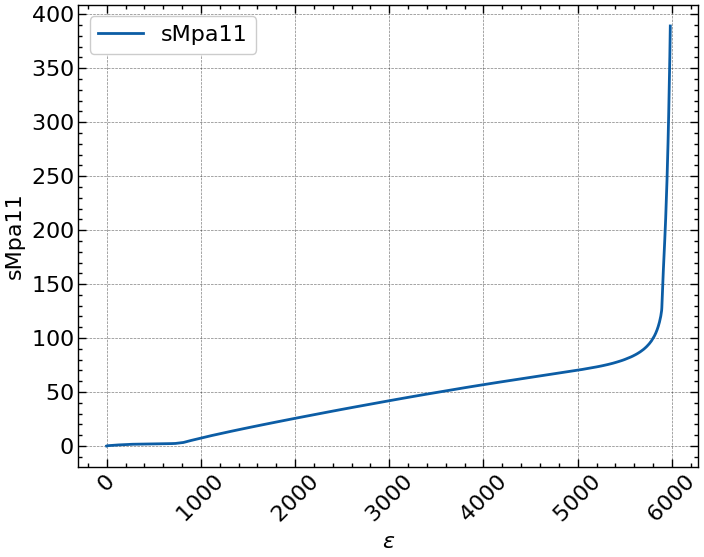

In [22]:
#| label: fig-sMpa-init 
#| fig-cap: "Діаграма деформації"

fig, ax = plt.subplots(1, 1)                   # Створюємо порожній графік
ax.plot(time_ser.index, time_ser.values)   # Додаємо дані до графіку
ax.legend([symbol])                        # Додаємо легенду
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

plt.xticks(rotation=45)                    # оберт позначок по осі Ох на 45 градусів

plt.savefig(f'{symbol}.jpg')               # Зберігаємо графік 
plt.show();                                # Виводимо графік

Для даного ряду, за потребою, можна виконувати подальші розрахунки. 

---

::: {.callout-warning}
## Увага

Знову повертаємось до Біткоїна. Для відтворення подальших розрахунків з Біткоїном блок коду в якому зчитувалась та виводилась крива "напруга-видовження" треба проігнорувати  

:::

Виведемо значення Біткоїна.

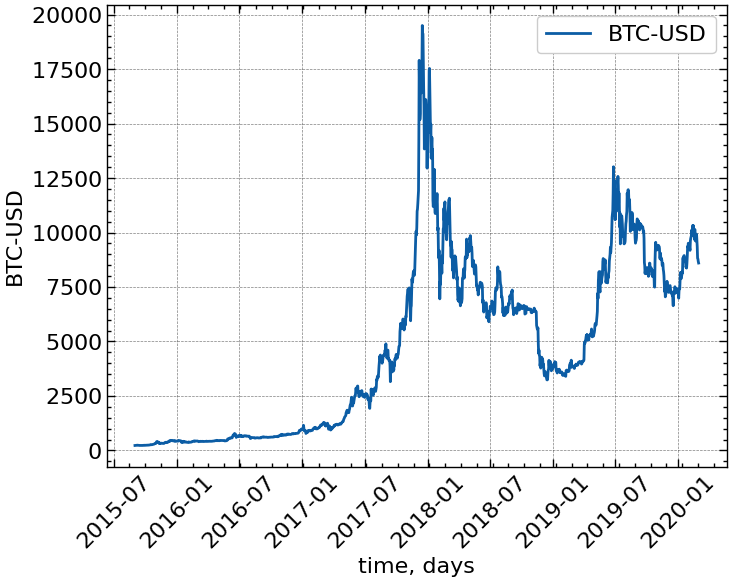

In [12]:
#| label: fig-btc-init 
#| fig-cap: "Динаміка щоденних змін індексу Біткоїна"

fig, ax = plt.subplots(1, 1)               # Створюємо порожній графік
ax.plot(time_ser.index, time_ser.values)   # Додаємо дані до графіку
ax.legend([symbol])                        # Додаємо легенду
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

plt.xticks(rotation=45)                    # оберт позначок по осі Ох на 45 градусів

plt.savefig(f'{symbol}.jpg')               # Зберігаємо графік 
plt.show();                                # Виводимо графік

Видно, що ряд нестаціонарний, що викликає певні ускладнення для подальшого аналізу. Тому перейдемо до прибутковостей, які вже є стаціонарними, а нормалізація стандартним відхиленням дозволяє легко порівнювати їх розподіл з розподілом Гауса. 

Прибутковості розраховуватимуться згідно [@eq-1-1]. У Python для цього ми використовуватимемо метод `pct_change()`, що доступний нам завдяки бібліотеці `pandas`. 

Стандартизовані прибутковості можна визначити як $g(t) = \left[G(t) - \mu \right] / \sigma$, де $\mu$ відповідає середньому значенню прибутковостей за досліджуваний часовий інтервал, а $\sigma$ представляє стандартне відхилення. 

In [13]:
ret = time_ser.copy()      # копіюємо значення вихідного ряду для збереження 
                           # його від змін

ret = ret.pct_change()     # знаходимо прибутковості
ret -= ret.mean()          # вилучаємо середнє 
ret /= ret.std()           # ділимо на стандартнє відхилення

ret = ret.dropna().values  # видаляємо всі можливі нульові значення 

Виводимо отриманий результат:

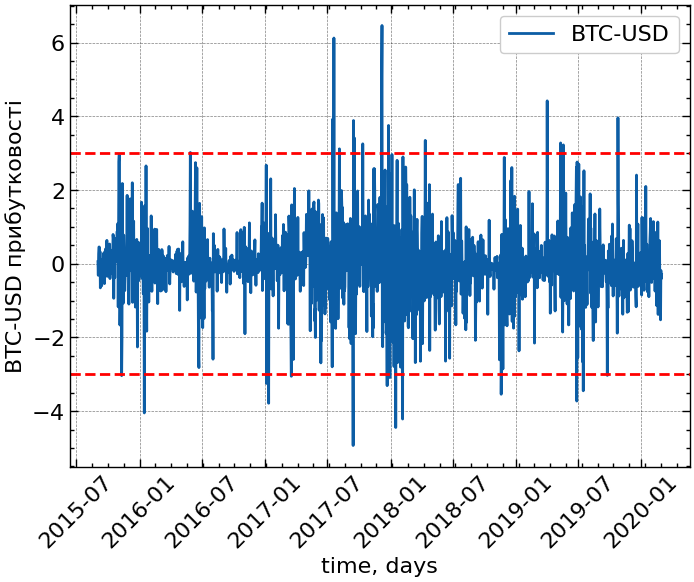

In [14]:
#| label: fig-btc-ret 
#| fig-cap: "Нормалізовані прибутковості досліджуваного часового ряду"

fig, ax = plt.subplots()                   # Створюємо порожній графік
ax.plot(time_ser.index[1:], ret)           # Додаємо дані до графіку
ax.legend([symbol])                        # Додаємо легенду
ax.set_xlabel(xlabel)                      # Додаємо підпис для вісі Ох
ax.set_ylabel(ylabel + ' прибутковості')   # Додаємо підпис для вісі Оу
ax.axhline(y = 3.0, color = 'r', linestyle = '--')  # Додаємо горизонтальну лінію, що роз-
                                                    # межує 3 сигма події
ax.axhline(y = -3.0, color = 'r', linestyle = '--') # Додаємо горизонтальну лінію, що роз-
                                                    # межує -3 сигма події

plt.xticks(rotation=45)                    # оберт позначок по осі Ох на 45 градусів

plt.savefig(f'Прибутковості{symbol}.jpg')  # Зберігаємо графік 
plt.show();                                # Виводимо графік

Зверніть увагу, що флуктуації нормалізованих прибутковостей досить часто перевищують величину $\pm 3\sigma$, що, як відомо, надзвичайно рідко спостерігається для незалежних подій. Цей факт можна відобразити шляхом порівняння функції розподілу нормалізованих флуктуацій з розподілом Гауса (@fig-btc-dist). Очевидно, що хвости розподілу вихідного ряду містять значні флуктуації, вони досить помітні (часто кажуть "важкі" у порівнянні з самою "головою" розподілу).  

Для побудови нормального розподілу скористаємось бібліотекою `scipy`. Встановити її можна за аналогією з попередніми бібліотеками.

In [19]:
#| output: false

# Для встановлення останньої версії scipy
!pip install scipy

In [15]:
from scipy.stats import norm # імпорт модуля norm для побудови Гаусового розподілу

Функція щільності ймовірності `norm` для дійсних значень $x$ має наступний вигляд: $f(x) = \exp{(-x^2/2)} \big/ \sqrt{2\pi}$.

In [16]:
mu, sigma = norm.fit(ret)

x = np.linspace(ret.min(), ret.max(), 10000) # Генеруємо 10000 значень для побудови 
                                             # Гаусового розподілу
p = norm.pdf(x, mu, sigma)                   # Отримання значень функції щільності

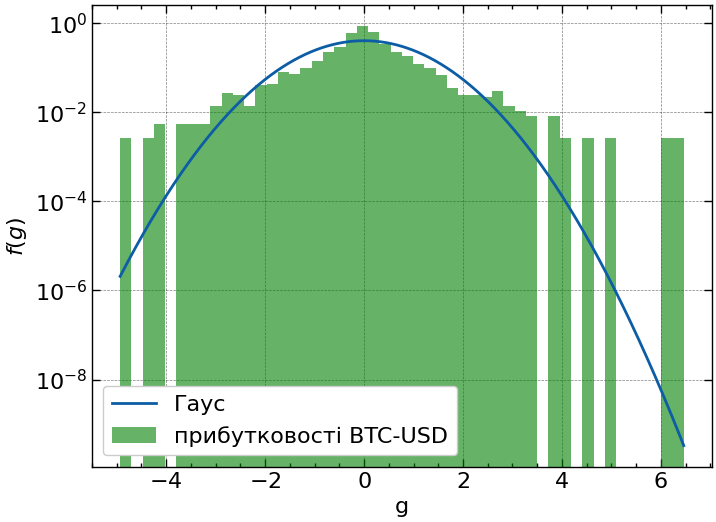

In [17]:
#| label: fig-btc-dist 
#| fig-cap: "Порівняння функцій розподілу нормалізованих прибутковостей з нормальним розподілом"

fig, ax = plt.subplots(1, 1)               # Створюємо порожній графік
ax.plot(x, p, label='Гаус')                # Додаємо дані до графіку
ax.hist(ret, bins=50,                      # Побудова гістограми для прибутковостей
        density=True, 
        alpha=0.6, 
        color='g',
        label='прибутковості '+symbol)

ax.legend()                                # Додаємо легенду
ax.set_xlabel("g")                         # Додаємо підпис для вісі Ох
ax.set_ylabel(r"$f(g)$")                   # Додаємо підпис для вісі Оу
ax.set_yscale('log')


plt.savefig(f'Гаус + прибутковості {symbol}.jpg')       # Зберігаємо графік 
plt.show();                                             # Виводимо графік

Як ми можемо бачити, крива Гауса відхиляється від істинної частоти настання подій, що перевищують $\pm 3\sigma$, і ми можемо стверджувати, що прибутковості не є незалежними. Підтвердження цьому факту будемо шукати шляхом вивчення кореляційних властивостей нашого часового ряду. 

Для простоти обчислень скористаємось функцією `signal_autocor()` бібліотеки `neurokit2`. Виглядає дана функція наступним чином:

**`signal_autocor(signal, lag=None, demean=True, method='auto', show=False)`**

**Параметри:**

- **signal** (*Union[list, np.array, pd.Series]*) --- вектор значень; 
- **lag** (*int*) --- часовий лаг. Якщо вказано, буде повернуто одне значення автокореляції сигналу з його власним лагом; 
- **demean** (*bool*) --- якщо має значення `True`, від сигналу буде відніматися середнє значення сигналу перед обчисленням автокореляції;
- **method** (*str*) --- використання `"auto"` запускає `scipy.signal.correlate` швидшого алгоритму. Інші методи зберігаються з причин застарілості, але не рекомендуються. Вони включають `"correlation"` (за допомогою `np.correlate()`) або `"fft"` (швидке перетворення Фур'є);
- **show** (*bool*) --- якщо значення `True`, побудувати графік автокореляції для всіх значень затримки. 

**Повертає:**

- **r** (*float*) --- крос-кореляція сигналу із самим собою на різних часових лагах. Мінімальний часовий лаг дорівнює 0, максимальний часовий лаг дорівнює довжині сигналу. Або значення кореляції на певному часовому лазі, якщо лаг не дорівнює `None`;
- **info** (*dict*) --- cловник, що містить додаткову інформацію, наприклад, довірчий інтервал.

In [18]:
# розрахунок автокореляції

r_init, _ = nk.signal_autocor(time_ser.values, 
                              method='correlation')  # для вихідних значень ряду                                                                    
r_ret, _ = nk.signal_autocor(ret, 
                             method='correlation')   # для прибутковостей
r_vol, _ = nk.signal_autocor(np.abs(ret), 
                             method='correlation')   # для модулів прибутковостей

r_range = np.arange(1, len(r_ret) + 1)               # генерація лагів

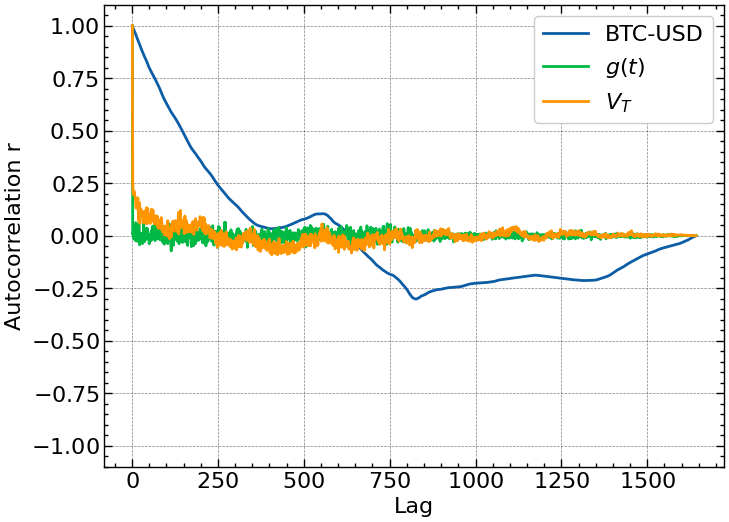

In [19]:
#| label: fig-btc-autocorr 
#| fig-cap: "Зміна з часом парних автокореляційних функцій для вихідного ряду x, 
#| нормалізованих прибутковостей g та їх модулів mod(g)"

fig, ax = plt.subplots(1, 1)                # Створюємо порожній графік

ax.plot(r_range, r_init[1:], label=symbol)  # Додаємо дані до графіку
ax.plot(r_range, r_ret, label=r'$g(t)$')                          
ax.plot(r_range, r_vol, label=r'$V_{T}$') 

ax.legend()                                 # Додаємо легенду
ax.set_xlabel("Lag")                        # Додаємо підпис для вісі Ох
ax.set_ylabel("Autocorrelation r")          # Додаємо підпис для вісі Оу
ax.set_ylim(-1.1, 1.1)                      # Встановлюємо обмеження по вісі Oy

plt.savefig(f'Автокореляції {symbol}.jpg')  # Зберігаємо графік 
plt.show();                                 # Виводимо графік

Але, досліджуючи складні системи, варто пам'ятати, що їх складність є варіативною. Тому і внутрішні кореляції системи на різних часових лагах також варіюються з плином часу. Із цього випливає, що подальщі розрахунки варто виконувати не для всього ряду, а для його фрагментів. 

Сформулюємо алгоритм ковзного (рухомого) вікна. Виділимо  фрагмент часового ряду (вікно), розрахуємо необхідні міри складності, змістимо вікно вздовж часового ряду на заздалегідь визначену величину (крок) і повторимо процедуру до вичерпання часового ряду. Далі, порівнюючи динаміку фактичного часового ряду і відповідних мір складності, ми матимемо змогу судити про характерні зміни в динаміці міри складності зі зміною досліджуваної системи. Якщо та чи інша міра складності поводиться характерним чином для всіх особливих періодів (наприклад, крахів), зменшується або збільшується у передкризовий період, то вона може служити їх індикатором або передвісником.

Розглянемо як поводитиме себе функція автокореляцій та волатильність в рамках алгоритму ковзного вікна.

Спочатку визначимо параметри:

In [20]:
ret_type = 4           # вид ряду: 
                       # 1 - вихідний, 
                       # 2 - детрендований (різниця між теп. значенням та попереднім)
                       # 3 - прибутковості звичайні, 
                       # 4 - стандартизовані прибутковості, 
                       # 5 - абсолютні значення (волатильності),
                       # 6 - стандартизований вихідний ряд 

length = len(time_ser) # довжина всього ряду

window = 250           # довжина вікна - період у межах якого розраховуватимуться наші індикатори
tstep = 1              # крок зміщення вікна
volatility = []        # масив значень волатильностей 
autocorr = []          # масив значень автокореляції при змінній lag

Далі розпочнемо розрахунки. Для відслідковування прогресу зміщення ковзного вікна скористаємось бібліотекою `tqdm`. Її можна встановити аналогічно попереднім бібліотекам:

In [26]:
#| output: false

!pip install tqdm

Імпортуємо модуль для візуалізації прогресу:

In [21]:
from tqdm import tqdm

І тепер приступимо до виконання віконної процедури:

In [22]:
for i in tqdm(range(0,length-window,tstep)):  # Фрагменти довжиною window  
                                              # з кроком tstep
                                              
    fragm = time_ser.iloc[i:i+window].copy() # відбираємо фрагмент

                                          # подальшому відбираємо потрібний тип ряду                                         
    if ret_type == 1:                     # вихідні значення 
        pass
    elif ret_type == 2:                   # різниці
        fragm = fragm[1:] - fragm[:-1]
    elif ret_type == 3:                   # прибутковості
        fragm = fragm.pct_change()
    elif ret_type == 4:                   # стандартизовані прибутковості
        fragm = fragm.pct_change()
        fragm -= fragm.mean()
        fragm /= fragm.std()
    elif ret_type == 5:                   # абсолютні значення прибутковостей
        fragm = fragm.pct_change()
        fragm -= fragm.mean()
        fragm /= fragm.std()
        fragm = fragm.abs()
    elif ret_type == 6:                   # стандартизований вихідний ряд
        fragm -= fragm.mean()
        fragm /= fragm.std()
        
    fragm = fragm.dropna().values         # видаляємо зайві нульові значення, якщо є
    
    # розрахунок віконної автокореляції
    r_window, _ = nk.signal_autocor(fragm, method='correlation') 

    # розрахунок волатильності по модулям прибутковостей                                     
    vol_window = np.mean(np.abs(fragm))

    # збереження результатів до масивів
    volatility.append(vol_window)
    autocorr.append(r_window[1])


100%|██████████| 1393/1393 [00:01<00:00, 1022.53it/s]


Збережемо результати в окремих текстових файлах:

In [23]:
# збереження результатів ковзної автокореляції
np.savetxt(f"autocorr_name={symbol}_ \
            window={window}_step={tstep}_ \
            rettype={ret_type}.txt", autocorr)

# збереження результатів ковзної волатильності
np.savetxt(f"volatility_name={symbol}_ \
            window={window}_step={tstep}_ \
            rettype={ret_type}.txt", volatility)

Нарешті, порівняємо динаміку вихідного ряду і розрахованих похідних. Для цього врахуємо, що автокореляцію і волатильність ми знаходили для рухомого вікна. Результати представлено на @fig-btc-all. 

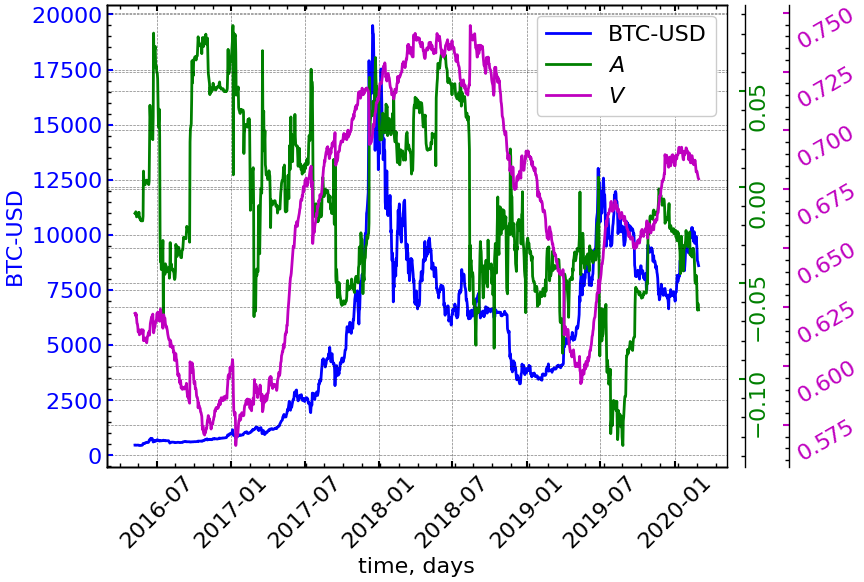

In [52]:
#| label: fig-btc-all 
#| fig-cap: "Динаміка індексу Біткоїна, віконних автокореляції та волатильності"

fig, ax = plt.subplots(1, 1)

ax2 = ax.twinx()
ax3 = ax.twinx()

ax2.spines.right.set_position(("axes", 1.03))
ax3.spines.right.set_position(("axes", 1.10))

p1, = ax.plot(time_ser.index[window:length:tstep], 
              time_ser.values[window:length:tstep], 
              "b-", label=fr"{ylabel}")

p2, = ax2.plot(time_ser.index[window:length:tstep], 
               autocorr, "g-", label=r"$A$")

p3, = ax3.plot(time_ser.index[window:length:tstep],
               volatility, "m-", label=r"$V$")

ax.set_xlabel(xlabel)
ax.set_ylabel(f"{ylabel}")

ax.yaxis.label.set_color(p1.get_color())
ax2.yaxis.label.set_color(p2.get_color())
ax3.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
ax2.tick_params(rotation=90, axis='y', colors=p2.get_color(), **tkw)
ax3.tick_params(rotation=30, axis='y', colors=p3.get_color(), **tkw)

ax.tick_params(rotation=45, axis='x', **tkw)

ax3.legend(handles=[p1, p2, p3])

plt.savefig(f"all_name={symbol}_ret={ret_type}_\
            wind={window}_step={tstep}.jpg")

plt.show();

Аналізуючи графік, можна зробити висновок, що у певні моменти спостерігалися стрибки волатильності (як і автокореляції) із поступовим зменшенням її до попереднього рівня, що може бути наслідком збурень у процесі роботи ринку. Аналіз таких збурень, їх частоти та сили, дозволяє виявляти приховані закономірності роботи ринку.

## Висновок

Таким чином, аналіз флуктуацій прибутковостей та волатильностей шляхом побудови функції автокореляції та розподілу ймовірності дозволяє отримати певні висновки, що можуть допомогти в роботі із аналізованими часовими рядами і ринком, з якого взято зазначені часові ряди. Зокрема, у даному випадку, можна надавати корисні рекомендації фінансовим аналітикам. 

## Завдання для самостійної роботи

1. Отримати індекс часового ряду у викладача
2. Провести дослідження згідно інструкції 
3. Дослідити зміни розрахованих величин для вікон 100 і 500, з кроком 1. Порівняти результати
4. Зробити висновки

## Контрольні питання

1. Порівняйте вид залежностей флуктуацій цін і прибутковостей. Чому при розрахунках користуються не цінами, а прибутковостями? 
2. Яку характеристику ряду визначає волатильність? 
3. У чому причина різних залежностей для прибутковостей та їх модулів? 

## Додаток

Для обрання часового індексу часового ряду використаємо дані, що розміщенні на сайті [Yahoo! Finance](https://finance.yahoo.com). Оскільки окремі фінансові показники не завжди є доступними, будемо використовувати список компаній, що входять до індексу [DJIA](https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average). За вказаним посиланням та номером у списку групи оберіть компанію, що входить до індексу та проведіть відповідні розрахунки. Порівняйте отримані результати з такими ж для Біткоїна.